In [1]:
from train import train_model
from MLP_model import MLP
from dataset import FourierFeaturesPixelDataset
from utils import get_B_gauss, plot_results
import config
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.optim as optim

Load and normalize the image in the range [0, 1]

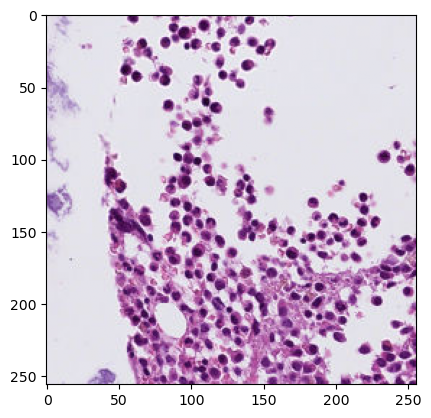

In [2]:
img = Image.open(config.IMG_FILENAME)
img = np.asarray(img)[:, :, :3] / 255
plt.imshow(img)


Create B matrix

In [3]:
B_gauss = get_B_gauss(mapping_size=config.MAPPING_SIZE, 
                      sigma=config.SIGMA,
                      seed=0)

Create train and validation dataset

In [4]:
train_dataset = FourierFeaturesPixelDataset(img=img,
                                            B=B_gauss,
                                            train=True)
train_dataloader = DataLoader(train_dataset, 
                              batch_size=len(train_dataset),
                              shuffle=config.SHUFFLE)

validation_dataset = FourierFeaturesPixelDataset(img=img,
                                                 B=B_gauss,
                                                 train=False)

validation_dataloader = DataLoader(validation_dataset, 
                                   batch_size=len(validation_dataset),
                                   shuffle=False)

Create the MLP model and the optimizer

In [5]:
model = MLP(input_dim=2*config.MAPPING_SIZE,
            num_layers=config.NETWORK_NUM_LAYERS,
            num_channels=config.NETWORK_CHANNELS)

optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

Train the model

In [6]:
history = train_model(model=model,
                      optimizer=optimizer,
                      num_epochs=config.NUM_EPOCHS,
                      train_dataloader=validation_dataloader,
                      val_dataloader=None,
                      device=config.DEVICE)

Epoch 776:   0%|          | 0/1 [00:00<?, ?batches/s]

Save model and history

In [ ]:
model.save_model(save_folder=config.SAVE_FOLDER)
model.save_history(history=history, save_folder=config.SAVE_FOLDER)

Load model

In [5]:
model_loaded = MLP.load_model(save_folder=config.SAVE_FOLDER)

Show results

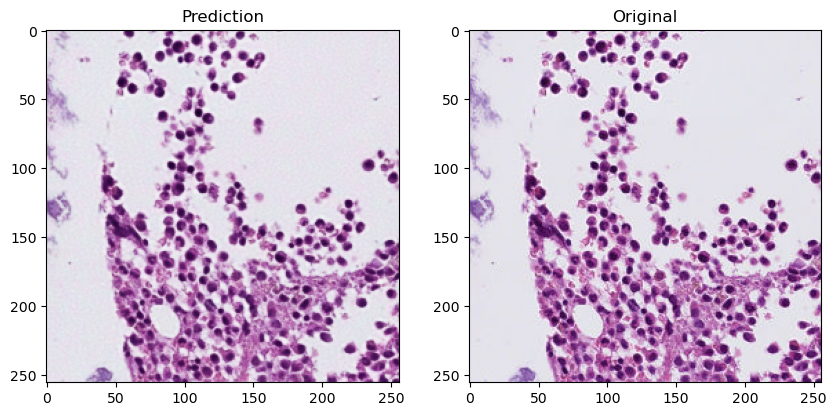

In [7]:
plot_results(original_img=img,
             validation_dataset=validation_dataset,
             model=model_loaded,
             device='cpu')


Number of model's parameters

In [9]:
# count the number of parameters in the model
num_params = model_loaded.get_num_parameters()
print(f'The model has {num_params:,} parameters')
print(f'Parameters/Pixels: {num_params / (img.shape[0] * img.shape[1] * img.shape[2])}')

The model has 263,683 parameters
Parameters/Pixels: 1.3411610921223958
